# Actividad 2
---------------------------------

- Alumno: Gonzalo Antonio Delgado Rubio
- Curso: 05MBID_04_B_2024-25

Continuación de Actividad 1 empleado 'features_data.csv'


In [5]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift, estimate_bandwidth, SpectralClustering, AgglomerativeClustering, OPTICS, cluster_optics_dbscan, Birch, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [6]:
df = pd.read_csv('features_data.csv')

df.head()

,id,age,agency_type,commision,distribution_channel,duration,net_sales,destination_category,agency_ADM,agency_ART,...,product_name_Rental Vehicle Excess Insurance,product_name_Silver Plan,product_name_Single Trip Travel Protect Gold,product_name_Single Trip Travel Protect Platinum,product_name_Single Trip Travel Protect Silver,product_name_Spouse or Parents Comprehensive Plan,product_name_Ticket Protector,product_name_Travel Cruise Protect,product_name_Value Plan,claim
0,45341,3.367296,0,3.371769,1,3.555348,4.731803,2,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12958,3.637586,0,2.635480,1,3.988984,3.637586,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,18233,3.332205,1,0.000000,1,3.367296,2.639057,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,31742,3.610918,1,0.000000,1,0.693147,3.555348,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,14381,3.295837,1,3.209229,1,3.526361,3.703768,2,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
df.shape

(98568, 50)

## 1. Separando Datos en Entrenamiento y Testeo

In [15]:

# Diviendo el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['claim', 'id'], axis=1), df['claim'], test_size=0.2, random_state=42)

## 2. Entrenamiento del Modelo Regresión Logística

Aplicaremos un primero Modelo de Regresión Lógistica dentro del cual obtendremos algunos de sus carácteristicas

In [16]:
# Crear un pipeline que primero escala los datos y luego aplica la regresión logística
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=101, max_iter=1000))

# Entrenar el modelo con datos escalados
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=101))])

### 2.1 Datos basados en Train

In [17]:
preds_train = pipeline.predict(X_train)

# Obteniendo matriz de confusión y reporte de clasificación del modelo con datos de entrenamiento
print(confusion_matrix(y_train, preds_train))
print(classification_report(y_train, preds_train))

[[34024  5321]
 [ 6204 33305]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     39345
           1       0.86      0.84      0.85     39509

    accuracy                           0.85     78854
   macro avg       0.85      0.85      0.85     78854
weighted avg       0.85      0.85      0.85     78854



Observamos que el modelo responde bajo un accurancy del 85%, el cual es un buen nro. Ahora evaluaremos la respuesta del modelo en base a los datos de test

### 2.2 Datos basados en test


In [18]:
y_preds = pipeline.predict(X_test)

# generando matriz de confusión y reporte de clasificación del modelo con datos de prueba
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[8652 1287]
 [1585 8190]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      9939
           1       0.86      0.84      0.85      9775

    accuracy                           0.85     19714
   macro avg       0.85      0.85      0.85     19714
weighted avg       0.85      0.85      0.85     19714



observamos de igual forma un accuracy del modelo del 85%

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

minority_class = y_train.value_counts().idxmin()
precision = precision_score(y_test, y_preds, pos_label=minority_class, average='binary')
recall = recall_score(y_test, y_preds, pos_label=minority_class, average='binary')

print(f'Precision (Clase Minoritaria): {precision}')
print(f'Recall (Clase Minoritaria): {recall}')


Precision (Clase Minoritaria): 0.845169483247045
Recall (Clase Minoritaria): 0.8705101116812557


In [29]:
# Obtener el modelo de regresión logística del pipeline
logistic_model = pipeline.named_steps['logisticregression']

# Obtener los coeficientes del modelo
coefficients = logistic_model.coef_

# Imprimir la importancia de cada variable para cada clase
for i, clase_importancias in enumerate(coefficients):
    print(f"Clase {i}:")
    for j, imp in enumerate(clase_importancias):
        print(f" Variable {j}: Importancia: {imp}")


Clase 0:
 Variable 0: Importancia: -0.08412343757657288
 Variable 1: Importancia: -14.845446673330457
 Variable 2: Importancia: -0.252312326142901
 Variable 3: Importancia: -0.7061985516008212
 Variable 4: Importancia: 0.28001776359316577
 Variable 5: Importancia: 0.7285544904736029
 Variable 6: Importancia: -0.6406828734442528
 Variable 7: Importancia: -0.5493182503747706
 Variable 8: Importancia: -0.47081248944086296
 Variable 9: Importancia: -3.5635000295047483
 Variable 10: Importancia: 0.06622821339252609
 Variable 11: Importancia: 0.07979325742506777
 Variable 12: Importancia: 0.04284355686597721
 Variable 13: Importancia: 1.9864091599206073
 Variable 14: Importancia: 3.23448976523593
 Variable 15: Importancia: -0.8543909377059923
 Variable 16: Importancia: -2.301282309026517
 Variable 17: Importancia: 1.726413921205158
 Variable 18: Importancia: 1.0054391574795463
 Variable 19: Importancia: -0.8329837341578553
 Variable 20: Importancia: -0.814839910834419
 Variable 21: Importanc

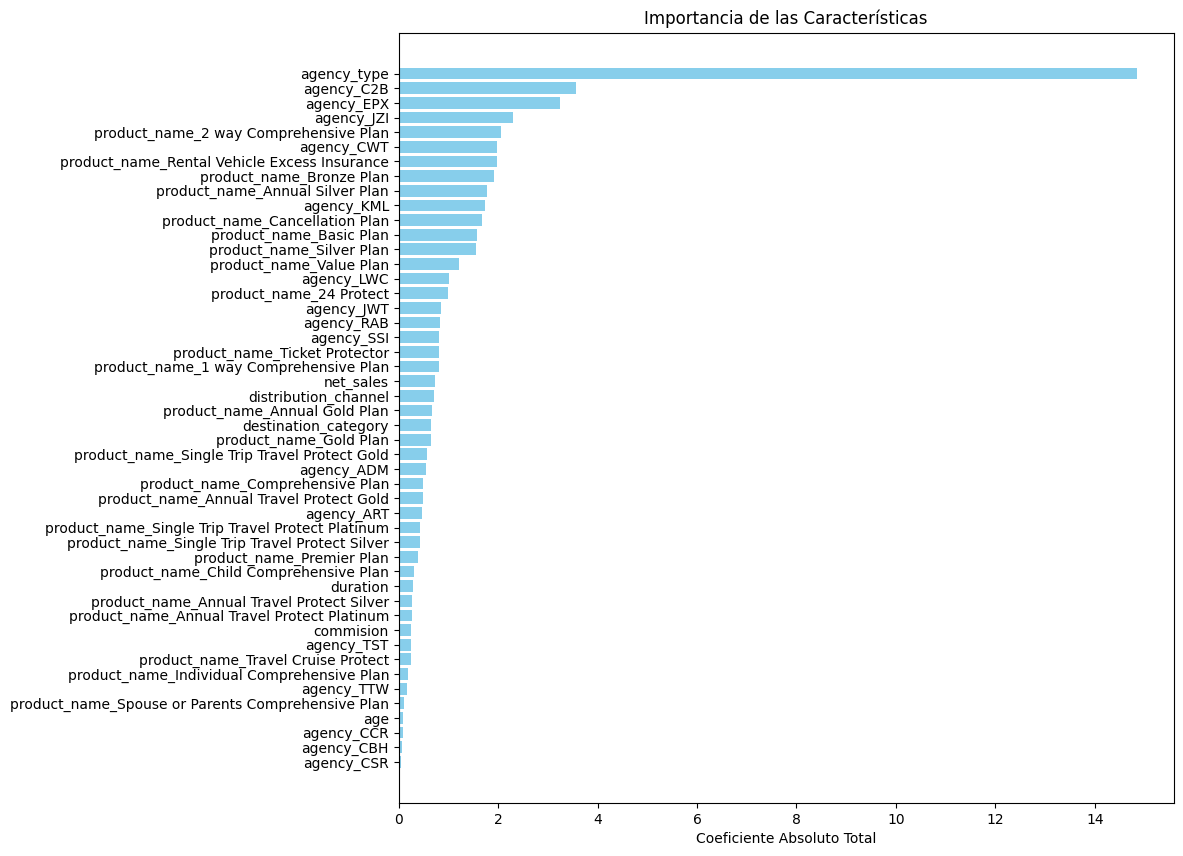

In [32]:
importance = np.sum(np.abs(coefficients), axis=0)
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Coeficiente Absoluto Total')
plt.title('Importancia de las Características')
plt.gca().invert_yaxis()  # Para que la característica más importante esté arriba
plt.show()

Observamos que las variables más importantes serían agency_type, agency_C2B

## 3. Entrenamiento del Modelo Arbol de Decisión - RandomForest

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo de Bosque Aleatorio
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el modelo
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3.1 Datos Basados en Train

In [38]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.9759054479050421
Matriz de Confusión:
 [[9792  147]
 [ 328 9447]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9939
           1       0.98      0.97      0.98      9775

    accuracy                           0.98     19714
   macro avg       0.98      0.98      0.98     19714
weighted avg       0.98      0.98      0.98     19714



observamos una alta precisión empleando un arbol de decisión, comprobaremos con los datos de entrenamiento

### 3.2 Datos Basados en Test

In [39]:
y_preds = clf.predict(X_test)

# generando matriz de confusión y reporte de clasificación del modelo con datos de prueba
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[9792  147]
 [ 328 9447]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9939
           1       0.98      0.97      0.98      9775

    accuracy                           0.98     19714
   macro avg       0.98      0.98      0.98     19714
weighted avg       0.98      0.98      0.98     19714



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

minority_class = y_train.value_counts().idxmin()
precision = precision_score(y_test, y_preds, pos_label=minority_class, average='binary')
recall = recall_score(y_test, y_preds, pos_label=minority_class, average='binary')

print(f'Precision (Clase Minoritaria): {precision}')
print(f'Recall (Clase Minoritaria): {recall}')


Precision (Clase Minoritaria): 0.9675889328063241
Recall (Clase Minoritaria): 0.985209779655901


In [43]:
# Obtener la importancia de las variables
importancias = clf.feature_importances_

# Imprimir la importancia de cada variable
for i, imp in enumerate(importancias):
    print(f"Variable {i}: Importancia: {imp}")

Variable 0: Importancia: 0.06492077695951892
Variable 1: Importancia: 0.07095614117014043
Variable 2: Importancia: 0.10890503822448952
Variable 3: Importancia: 0.002636583275968888
Variable 4: Importancia: 0.07910202773954123
Variable 5: Importancia: 0.09408141951678026
Variable 6: Importancia: 0.0017776810905786944
Variable 7: Importancia: 7.111638852094281e-05
Variable 8: Importancia: 0.0007979425519735714
Variable 9: Importancia: 0.1379088581163865
Variable 10: Importancia: 0.00021754486057577716
Variable 11: Importancia: 0.00031267480547826783
Variable 12: Importancia: 5.870307678184546e-05
Variable 13: Importancia: 0.03565607431359415
Variable 14: Importancia: 0.08555463632580253
Variable 15: Importancia: 0.0014962620675491453
Variable 16: Importancia: 0.024747640825557977
Variable 17: Importancia: 0.0018386146833119362
Variable 18: Importancia: 0.007129660102093466
Variable 19: Importancia: 0.0006581595226009461
Variable 20: Importancia: 0.0035144430594896852
Variable 21: Importa

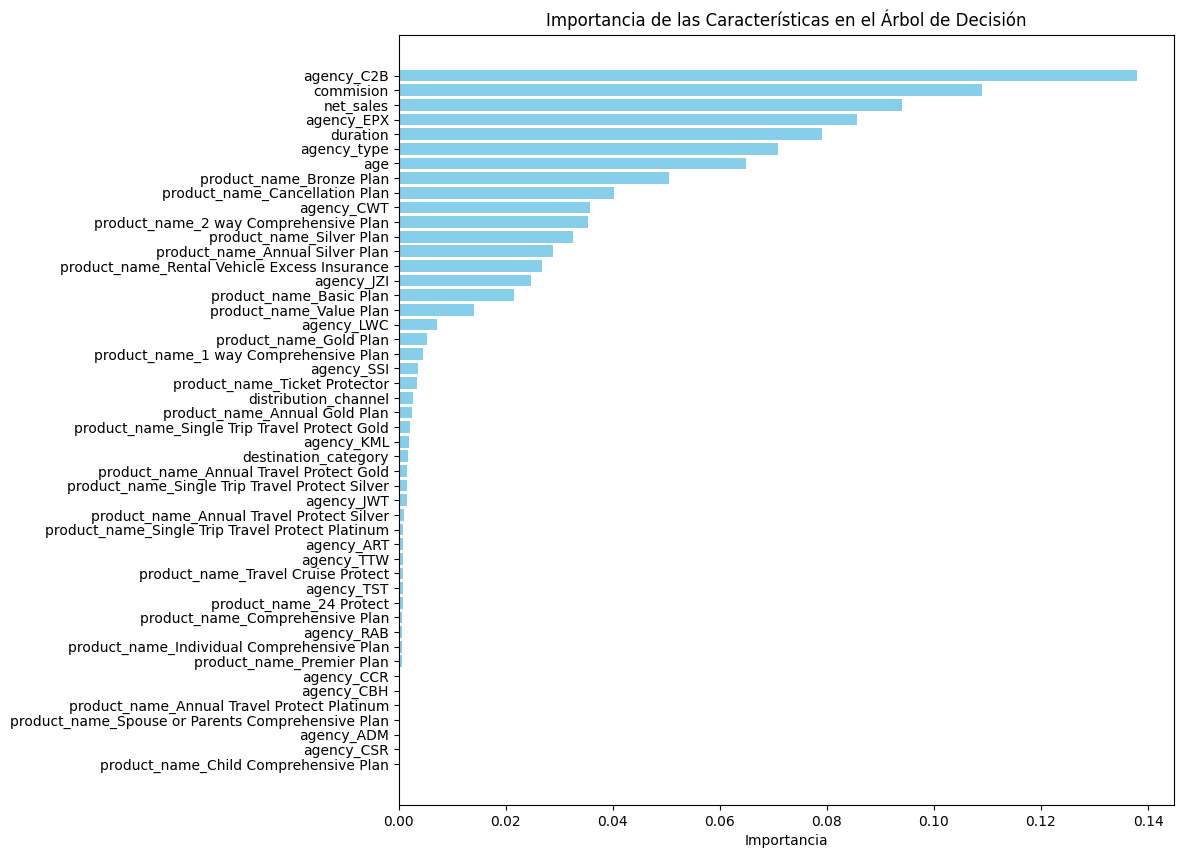

In [47]:
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importancias
}).sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.gca().invert_yaxis()  # Para que la característica más importante esté arriba
plt.show()

Aqui vemos que las variables más importantes cambian un poco respecto al modelo anterior

## 4. Eligiendo Mejor Modelo

In [52]:
def validar_overfiting_modelo(modelo, X_train, y_train, X_test, y_test):
    # Entrenar el modelo con datos de entrenamiento
    modelo.fit(X_train, y_train)
    # Predecir las etiquetas para el conjunto de entrenamiento
    y_pred_train = modelo.predict(X_train)
    # Predecir las etiquetas para el conjunto de prueba
    y_pred_test = modelo.predict(X_test)
    # Evaluar el modelo
    print("Exactitud (Entrenamiento):", accuracy_score(y_train, y_pred_train))
    print("Exactitud (Prueba):", accuracy_score(y_test, y_pred_test))

    print("Matriz de Confusión (Entrenamiento):\n", confusion_matrix(y_train, y_pred_train))
    print("Matriz de Confusión (Prueba):\n", confusion_matrix(y_test, y_pred_test))

    print("Reporte de Clasificación (Entrenamiento):\n", classification_report(y_train, y_pred_train))
    print("Reporte de Clasificación (Prueba):\n", classification_report(y_test, y_pred_test))

    return y_pred_train, y_pred_test

In [53]:
# Validando estadísticas modelo RandomForest
validar_overfiting_modelo(clf, X_train, y_train, X_test, y_test)

Exactitud (Entrenamiento): 0.997996296953864
Exactitud (Prueba): 0.9759054479050421
Matriz de Confusión (Entrenamiento):
 [[39323    22]
 [  136 39373]]
Matriz de Confusión (Prueba):
 [[9792  147]
 [ 328 9447]]
Reporte de Clasificación (Entrenamiento):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39345
           1       1.00      1.00      1.00     39509

    accuracy                           1.00     78854
   macro avg       1.00      1.00      1.00     78854
weighted avg       1.00      1.00      1.00     78854

Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      9939
           1       0.98      0.97      0.98      9775

    accuracy                           0.98     19714
   macro avg       0.98      0.98      0.98     19714
weighted avg       0.98      0.98      0.98     19714



(array([1, 1, 1, ..., 1, 0, 0]), array([0, 1, 0, ..., 0, 1, 0]))

In [54]:
# Validando estadísticas modelo Regresión Logística
validar_overfiting_modelo(pipeline, X_train, y_train, X_test, y_test)

Exactitud (Entrenamiento): 0.8538438126157202
Exactitud (Prueba): 0.8543167292279599
Matriz de Confusión (Entrenamiento):
 [[34024  5321]
 [ 6204 33305]]
Matriz de Confusión (Prueba):
 [[8652 1287]
 [1585 8190]]
Reporte de Clasificación (Entrenamiento):
               precision    recall  f1-score   support

           0       0.85      0.86      0.86     39345
           1       0.86      0.84      0.85     39509

    accuracy                           0.85     78854
   macro avg       0.85      0.85      0.85     78854
weighted avg       0.85      0.85      0.85     78854

Reporte de Clasificación (Prueba):
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      9939
           1       0.86      0.84      0.85      9775

    accuracy                           0.85     19714
   macro avg       0.85      0.85      0.85     19714
weighted avg       0.85      0.85      0.85     19714



(array([1, 1, 1, ..., 1, 0, 0]), array([0, 1, 0, ..., 0, 1, 1]))

EL modelo de RandomForest aparenta tener overfiting por lo que para este caso nos quedaremos con el modelo de Regresión logística

## 5. Generando Archivo Salida

In [55]:
y_preds = pipeline.predict(X_test)

In [56]:
# Create a DataFrame with the expected and predicted outputs
output_df = pd.DataFrame({'Expected': y_test, 'Predicted': y_preds})

# Save the DataFrame to a CSV file
output_df.to_csv('output.csv', index=False)